In [188]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import requests
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from string import punctuation
import contractions
from unidecode import unidecode
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from gensim.models import Word2Vec, KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.cluster import KMeans
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim_models
import string
import warnings
warnings.simplefilter('ignore')
from itertools import chain
from nltk import Counter
import pandas as pd
import numpy as np
from langdetect import detect
from googletrans import Translator
from nltk import word_tokenize, sent_tokenize
from nltk import ngrams
import yellowbrick
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

In [122]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package basqu

True

In [123]:
link = "https://www.flipkart.com/nikon-d3100-dslr-camera/product-reviews/itmepy8d8bse2v2g?pid=CAMCVYDJFGDFZJAG&page="
reviews = []

In [124]:
# HTML source code being extracted from website - Carrerbliss, total no of pages - 10 nos
for i in range (1,11): # Using for loop for extraction of source code in one go
    request = requests.get(link+str(i))
    soup = bs(request.content,'html.parser') # Initializing the object wiht HTML page
    samples =soup.find_all('div',class_='t-ZTKy') # Extracting the reviews from HTML code using pattern(head and class)
                                                        # Here the head is - 'p' and class is 'comments foggy' which is defined
                                                        # for each and every review the user will enter
    reviews.append(samples) # appending the extracted reviews from page 1 - page 9 in a single variable/list

In [125]:
# <div class="t-ZTKy"><div><div class="">Purchased this about 3 weeks back, and am amazed at its performance:<br>- My decision to buy Nikon D3100 v/s Canon 1100D was not bad. Though more expensive, the feel in hand, compactness, sensor size, HD movies capability, 3" dispalay, rubber grip tilted my decision towards Nikon.<br>- excellent image quality &amp; low noise at 14MP, even with flash.<br>- Kit lens has its limitations, but ok for me to begin with experimenting.<br>- I manual focusing for macro / close up shots much better than autofocus.<br>- Th...</div><span class="_1BWGvX"><span>READ MORE</span></span></div></div>

In [126]:
reviews

[[<div class="t-ZTKy"><div><div class="">Lets begin!<br/>Nikon , one of the best camera makers -- we all know right.<br/>Again the company has done it with D3100. If you are a regular digital camera user and buying this as you first DSLR you will fall in love with it at first look (really).<br/>The basics;<br/>You can get the specs from any where you want so i am not wasting in writing it.<br/>Still, i will have a say about the image sensor size which is the heart of any camera and trust me this has a golden heart. If you wish to know the conversion of...</div><span class="_1BWGvX"><span>READ MORE</span></span></div></div>,
  <div class="t-ZTKy"><div><div class="">Purchased this about 3 weeks back, and am amazed at its performance:<br/>- My decision to buy Nikon D3100 v/s Canon 1100D was not bad. Though more expensive, the feel in hand, compactness, sensor size, HD movies capability, 3" dispalay, rubber grip tilted my decision towards Nikon.<br/>- excellent image quality &amp; low nois

In [127]:
list_rev = [] # To separate each comment/review applying nested for loop, since we've reviews in teh form of list under list
              # and to conver it into single list we've applied nested for loop
for i in reviews:
    for j in (i):
        list_rev.append(j)
print((list_rev)) # displaying list_rev

[<div class="t-ZTKy"><div><div class="">Lets begin!<br/>Nikon , one of the best camera makers -- we all know right.<br/>Again the company has done it with D3100. If you are a regular digital camera user and buying this as you first DSLR you will fall in love with it at first look (really).<br/>The basics;<br/>You can get the specs from any where you want so i am not wasting in writing it.<br/>Still, i will have a say about the image sensor size which is the heart of any camera and trust me this has a golden heart. If you wish to know the conversion of...</div><span class="_1BWGvX"><span>READ MORE</span></span></div></div>, <div class="t-ZTKy"><div><div class="">Purchased this about 3 weeks back, and am amazed at its performance:<br/>- My decision to buy Nikon D3100 v/s Canon 1100D was not bad. Though more expensive, the feel in hand, compactness, sensor size, HD movies capability, 3" dispalay, rubber grip tilted my decision towards Nikon.<br/>- excellent image quality &amp; low noise a

In [128]:
review = []
for i in range (0, len(list_rev)):
    review.append(list_rev[i].get_text()) # To remove unwanted text such as class and comment pattern, applying get_text command
                                          # and appending it into a new variable - review
print(review) #displaying processed review

['Lets begin!Nikon , one of the best camera makers -- we all know right.Again the company has done it with D3100. If you are a regular digital camera user and buying this as you first DSLR you will fall in love with it at first look (really).The basics;You can get the specs from any where you want so i am not wasting in writing it.Still, i will have a say about the image sensor size which is the heart of any camera and trust me this has a golden heart. If you wish to know the conversion of...READ MORE', 'Purchased this about 3 weeks back, and am amazed at its performance:- My decision to buy Nikon D3100 v/s Canon 1100D was not bad. Though more expensive, the feel in hand, compactness, sensor size, HD movies capability, 3" dispalay, rubber grip tilted my decision towards Nikon.- excellent image quality & low noise at 14MP, even with flash.- Kit lens has its limitations, but ok for me to begin with experimenting.- I manual focusing for macro / close up shots much better than autofocus.- 

In [129]:
df_review = pd.DataFrame(review, columns=["Review"]) # incorporating the reviews in list format into Data Frame
df_review #dispalying Data frame containing a total of 99 reviews/comments

,Review
0,"Lets begin!Nikon , one of the best camera make..."
1,"Purchased this about 3 weeks back, and am amaz..."
2,I am impressed .This is my first DSLR and I am...
3,Its been 8 months im using it n im totally hap...
4,I have been using my D3100 for about a year an...
...,...
95,i had experience with the model and i am satis...
96,Nikon is always the best. After so much resear...
97,I got it for the best price.There was a differ...
98,"Good product for beginners, with large image s..."


In [211]:
def remove_new_lines(self): # removal of new lines and extra spaces
    clean_text1 = self.replace('\n',' ').replace('\t',' ').replace('\\',' ')
    return clean_text1

def expanded_text(self): # Performing contraction mapping, ex - converting didn't into did not, so as to seaprate negative words
    contracted_text = contractions.fix(self)
    return contracted_text

def acccented_char(self): # defining accented characters like á, ä, Å, etc
    text2 = unidecode(self)
    return text2

stopword_list = stopwords.words('english') # defining stopwords list so as to remove those words from text which would only
                                           # increase teh size and processing time of the data and would not have any impact
                                           # on result (English stop words linke - a, an ,the, of, etc.)
stopword_list.remove('no')# removing negative stopwords from our stopword_list like no, nor, not from english stopwords list
                           # as it would have an impact on result while performing sentimental analysis
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data1(self): # converting all teh text into lower case so as to avoid case of differentitation(ex- company and Comapny)
                       # removing of stopwords, removal of numeric text, removal of puntuation and removal of words having 
                       # length less or equal to 2
    tokens  = word_tokenize(self)
    clean_text = [word.lower() for word in tokens if (word.lower() not in stopword_list) and 
                  (word.isalpha()) and (word not in punctuation) and (len(word)>2)]
    return clean_text

def Lemmatization(self): # Performing lemmatization so as to bring word which are having same meaning but are used in different
                         # tenses on a single platform ex - run, runs, running all these three words would be converted into
                         # 'run'
    lemma = WordNetLemmatizer()
    final_list = []
    for word in self:
        lemmatized_word = lemma.lemmatize(word)
        final_list.append(lemmatized_word)
    return final_list

def join_data(self): # joining the text after applying all the above fundtions
    return ' '.join(self)

In [131]:
clean_data = df_review['Review'].apply(remove_new_lines) # applying remove_new_lines function

clean_data = clean_data.apply(expanded_text) # applying contraction mapping 

clean_data = clean_data.apply(acccented_char) # applying accented_char function

clean_data = clean_data.apply(clean_data1) # applying clean_data1 function (removal of stopwords)

clean_data = clean_data.apply(Lemmatization) # applying lemmatization function

final_clean_data = clean_data.apply(join_data) # applying join_data function

# All the above function were apllied subsequently so as to get the desired output

In [132]:
print(final_clean_data) #displaying final clean data

0     let begin nikon one best camera maker know com...
1     purchased week back amazed performance decisio...
2     impressed first dslr loving thing tell many pe...
3     month using totally happy camera feature might...
4     using year half bought see price not dropped m...
                            ...                        
95    experience model satisfied result required mod...
96    nikon always best much research comparison dil...
97    got best difference compared cheaper delivered...
98    good product beginner large image sensor white...
99    bought expected date delivered good condition ...
Name: Review, Length: 100, dtype: object


In [133]:
# N-grams - to measure frequency of word in order to predicts the most probable word that might follow this sequence.

<!-- #### ngrams - To measure frequency of word in order to predicts the most probable word that might follow this sequence. -->

In [134]:
def ngram_visualizer(data,ngram_range):
    tokens = word_tokenize(data)
    ngram_list = ngrams(tokens,ngram_range)
    empty_list = []
    for kw in ngram_list:
        empty_list.append(" ".join([kw[0],kw[1]]))
    return empty_list

In [135]:
unigram = final_clean_data.apply(lambda x : ngram_visualizer(x,2))

In [136]:
final_unigram = []
for uni in unigram:
    final_unigram.extend(uni)

In [137]:
final_unigram

['let begin',
 'begin nikon',
 'nikon one',
 'one best',
 'best camera',
 'camera maker',
 'maker know',
 'know company',
 'company done',
 'done regular',
 'regular digital',
 'digital camera',
 'camera user',
 'user buying',
 'buying first',
 'first dslr',
 'dslr fall',
 'fall love',
 'love first',
 'first look',
 'look really',
 'really basic',
 'basic get',
 'get spec',
 'spec want',
 'want not',
 'not wasting',
 'wasting writing',
 'writing say',
 'say image',
 'image sensor',
 'sensor size',
 'size heart',
 'heart camera',
 'camera trust',
 'trust golden',
 'golden heart',
 'heart wish',
 'wish know',
 'know conversion',
 'conversion read',
 'purchased week',
 'week back',
 'back amazed',
 'amazed performance',
 'performance decision',
 'decision buy',
 'buy nikon',
 'nikon canon',
 'canon not',
 'not bad',
 'bad though',
 'though expensive',
 'expensive feel',
 'feel hand',
 'hand compactness',
 'compactness sensor',
 'sensor size',
 'size movie',
 'movie capability',
 'capabili

In [138]:
cnt = Counter(final_unigram).most_common(25)  
print(cnt)

[('entry level', 18), ('level dslr', 12), ('first dslr', 11), ('point shoot', 10), ('kit lens', 7), ('best camera', 6), ('dslr camera', 6), ('nikon dslr', 6), ('dslr photography', 6), ('one best', 5), ('good camera', 5), ('best entry', 5), ('auto focus', 5), ('digital camera', 4), ('nikon canon', 4), ('lens good', 4), ('easy use', 4), ('flipkart delivery', 4), ('dslr not', 4), ('bought nikon', 4), ('image sensor', 3), ('buy nikon', 3), ('lens come', 3), ('price range', 3), ('awesome camera', 3)]


In [139]:
def word_cloud(data):
    df = data.str.cat(sep=" ") # we merged all the reviews 
    text = " ".join([word for word in df.split()]) # "word1 word2 word3 word4 "
    wordcloud = WordCloud(width=500,height=700).generate(text)
    plt.figure(figsize=(10,16))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

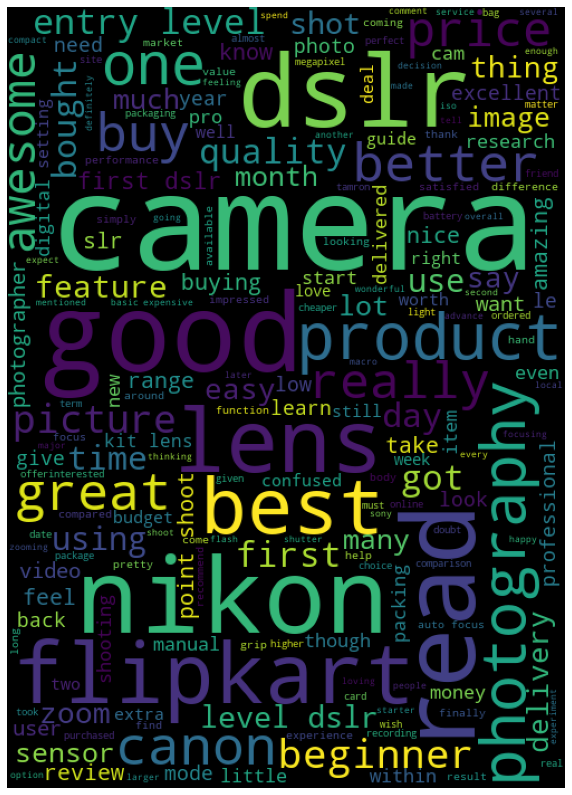

In [140]:
word_cloud(final_clean_data)

In [141]:
# preprocessing 
def remove_new_lines(data):
    text = data.replace("\\n"," ").replace("\t"," ").replace("\\"," ")
    return text

# 2. contraction mapping 
def exapnding_text(data):
    expanded_text = contractions.fix(data)
    return expanded_text

# 3. handling accented character
def handling_accented(data):
    text = unidecode(data)
    return text

# 4. cleaning : tokenization,remove punctuation,normalization,remove stopword,len(word)<2 remove , remove numbers
stopword_list = stopwords.words("english")
stopword_list.remove('no')
stopword_list.remove('nor')
stopword_list.remove('not')

def clean_data(data):
    tokens = word_tokenize(data)
    clean_text = [word.lower() for word in tokens if (word not in punctuation) and(word.lower() not in stopword_list) and(len(word)>2) and(word.isalpha())]
    return clean_text


# 5. stemming or lemmatization
def lemmatization(data):
    lemmatizer = WordNetLemmatizer()
    final_list = []
    for word in data:
        lemmatized_word = lemmatizer.lemmatize(word)
        final_list.append(lemmatized_word)
    return final_list
    
clean_train_data = final_clean_data.apply(remove_new_lines)

clean_train_data = clean_train_data.apply(exapnding_text)

clean_train_data = clean_train_data.apply(handling_accented)

clean_train_data = clean_train_data.apply(clean_data)

clean_train_data = clean_train_data.apply(lemmatization)

In [142]:
def join_list(data):
    return " ".join(data)

clean_train_data = clean_train_data.apply(join_list)

In [143]:
clean_train_data

0     let begin nikon one best camera maker know com...
1     purchased week back amazed performance decisio...
2     impressed first dslr loving thing tell many pe...
3     month using totally happy camera feature might...
4     using year half bought see price not dropped m...
                            ...                        
95    experience model satisfied result required mod...
96    nikon always best much research comparison dil...
97    got best difference compared cheaper delivered...
98    good product beginner large image sensor white...
99    bought expected date delivered good condition ...
Name: Review, Length: 100, dtype: object

# Feature Engineering

#### CountVectorizer

In [172]:
Vectorized = CountVectorizer() # Perofrming count vectorizer which is basically a part of feature engineering where ot extracts
                               # the unique words form the document and converts in into feature
count_vec = Vectorized.fit_transform(clean_train_data).A
df = pd.DataFrame(count_vec,columns = Vectorized.get_feature_names()) # creating data frame of count vectorizer
df #displaying data frame of count vetorizer
# Text vectorization 

# # 1. count vectorizer 
# count = CountVectorizer()
# bow = count.fit_transform(clean_train_data).A
# pd.DataFrame(bow,columns= count.get_feature_names())

,ability,able,absence,absolutely,accessory,according,across,actually,adjust,advance,...,writing,wrong,yeah,year,yet,youtube,youvishwanath,zeroed,zoom,zooming
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TfidfVectorizer

In [145]:
# applying feature engineering method of tfidf (Term frequency-inverse document frequency) to convert the text into vectors
# conversion of text into vectors mainly depends upon the frequency and weight of the text in overall document
tf_idf_vec = TfidfVectorizer()
tfidf = tf_idf_vec.fit_transform(clean_train_data).A
pd.DataFrame(tfidf,columns=tf_idf_vec.get_feature_names())

,ability,able,absence,absolutely,accessory,according,across,actually,adjust,advance,...,writing,wrong,yeah,year,yet,youtube,youvishwanath,zeroed,zoom,zooming
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.187195,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.193791,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.134572,0.177827
4,0.000000,0.0,0.227783,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.163627,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
96,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
97,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
98,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


#### Word2vec customized vectorization

In [161]:
def tokenize(self): # performing tokenization so as to create vectors through customized model
    token = word_tokenize(self)
    return token
clean_trained_data_W2V = clean_train_data.apply(tokenize)
type(clean_trained_data_W2V)

pandas.core.series.Series

In [162]:
customized_model = Word2Vec(clean_trained_data_W2V,window=6) # creating instance of the model

In [164]:
import numpy as np
def vetorizer(list_of_docs,model):
    feature = [] # append vector of a doc 
    for doc in list_of_docs: # iterating over reviews
        zero_vector = np.zeros(model.vector_size) # handling key error
        vectors = [] # for saving vector of each word
        for word in doc : # iterating over each review
            if word in model.wv : # checking if word is in model
                try : # print(model[word])
                    vectors.append((model.wv[word])) # appending vector of a word
                except KeyError: # handling key error
                    continue
        if vectors :
            vectors = np.asarray(vectors) # converting all arrays into a single array
            avg_vec = vectors.mean(axis=0) # avarage
            feature.append(avg_vec) # appending vector of a doc : avarage of all vectors
        else :
            feature.append(zero_vector) # if a doc does not have vector : appending zero vector 
    return feature
# doc : w1,w2,w3 = [vect1,vect2,vect3]

In [165]:
# customized model
features_with_customized = vetorizer(clean_trained_data_W2V,customized_model)

In [168]:
x_emb_custom = np.array(features_with_customized)

In [200]:
# build kmeans
def build_kmeans(clusters,data):
    kmeans_model = KMeans(n_clusters=clusters)
    y_pred = kmeans_model.fit_predict(data)
    return kmeans_model,y_pred

In [201]:
# kmeans-count 
kmeans_count_model,count_pred = build_kmeans(2,count_vec)

In [202]:
# kmeans- tfidf
kmeans_tfidf_model,tfidf_pred = build_kmeans(2,tfidf)

In [203]:
# kmeans - customized word2vec 
kmeans_customized_model,customized_pred = build_kmeans(2,x_emb_custom)

In [204]:
# evaluation 
print(f"Silhouette score with count-kmeans {silhouette_score(count_vec,count_pred)}")
print(f"Silhouette score with tfidf-kmeans {silhouette_score(tfidf,tfidf_pred)}")
print(f"Silhouette score with customized-kmeans {silhouette_score(x_emb_custom,customized_pred)}")

Silhouette score with count-kmeans 0.060438850097054735
Silhouette score with tfidf-kmeans 0.003215667730925747
Silhouette score with customized-kmeans 0.5076205003253833


In [205]:
def visualizer(data,model):
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(data)

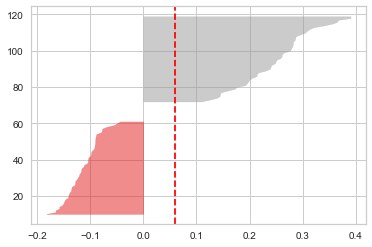

In [206]:
# count-kmeans
visualizer(count_vec,kmeans_count_model)

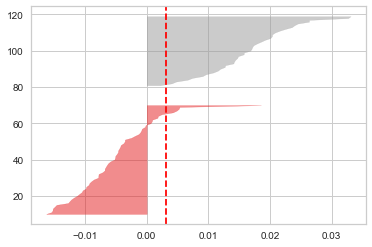

In [207]:
# tfidf-kmeans
visualizer(tfidf,kmeans_tfidf_model)

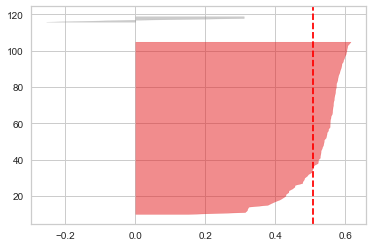

In [208]:
# customized-kmeans
visualizer(x_emb_custom,kmeans_customized_model)

In [212]:
df_review['target'] = count_pred

In [213]:
df_review

,Review,target
0,"Lets begin!Nikon , one of the best camera make...",0
1,"Purchased this about 3 weeks back, and am amaz...",0
2,I am impressed .This is my first DSLR and I am...,0
3,Its been 8 months im using it n im totally hap...,0
4,I have been using my D3100 for about a year an...,0
...,...,...
95,i had experience with the model and i am satis...,1
96,Nikon is always the best. After so much resear...,1
97,I got it for the best price.There was a differ...,1
98,"Good product for beginners, with large image s...",1


# Theme_for_topic_Modelling:

In [214]:
# Cleaning the data
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = '' .join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()

In [215]:
df_review['Clean_Review'] = df_review['Review'].apply(clean)
df_review # Dataframe after cleaning of text

,Review,target,Clean_Review
0,"Lets begin!Nikon , one of the best camera make...",0,"[let, beginnikon, one, best, camera, maker, kn..."
1,"Purchased this about 3 weeks back, and am amaz...",0,"[purchased, 3, week, back, amazed, performance..."
2,I am impressed .This is my first DSLR and I am...,0,"[impressed, this, first, dslr, loving, itfirst..."
3,Its been 8 months im using it n im totally hap...,0,"[8, month, im, using, n, im, totally, happy, c..."
4,I have been using my D3100 for about a year an...,0,"[using, d3100, year, half, now, bought, 29000,..."
...,...,...,...
95,i had experience with the model and i am satis...,1,"[experience, model, satisfied, result, require..."
96,Nikon is always the best. After so much resear...,1,"[nikon, always, best, much, research, comparis..."
97,I got it for the best price.There was a differ...,1,"[got, best, pricethere, difference, r, 5000, c..."
98,"Good product for beginners, with large image s...",1,"[good, product, beginner, large, image, sensor..."


In [216]:
dictionary = corpora.Dictionary(df_review['Clean_Review']) # creating dictionaries 
print(dictionary.num_nnz)

2980


In [217]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_review['Clean_Review']] #Create document term matrix
print(len(doc_term_matrix))

100


In [218]:
lda = gensim.models.ldamodel.LdaModel #Instantiate LDA model

In [219]:
num_topics = 3 #Fit LDA model on the dataset
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes= 50,minimum_probability=0)

CPU times: total: 5 s
Wall time: 5.14 s


In [220]:
ldamodel.print_topics(num_topics=num_topics) #Print the topics identified by LDA model

[(0,
  '0.029*"camera" + 0.019*"dslr" + 0.014*"good" + 0.012*"flipkart" + 0.012*"nikon" + 0.010*"photography" + 0.009*"first" + 0.009*"lens" + 0.008*"one" + 0.008*"best"'),
 (1,
  '0.019*"camera" + 0.016*"dslr" + 0.015*"good" + 0.013*"nikon" + 0.013*"d3100" + 0.012*"lens" + 0.009*"product" + 0.009*"best" + 0.008*"level" + 0.008*"entry"'),
 (2,
  '0.010*"good" + 0.009*"nikon" + 0.009*"camera" + 0.009*"lens" + 0.007*"better" + 0.007*"photography" + 0.007*"flipkart" + 0.007*"dslr" + 0.006*"bought" + 0.006*"one"')]

In [221]:
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, sort_topics=False, mds='mmds')
pyLDAvis.display(lda_display) #Visualize the LDA model results

In [222]:
# Assigns the topics to the documents in corpus
lda_corpus = ldamodel[doc_term_matrix]

In [223]:
[doc for doc in lda_corpus]

[[(0, 0.9833715), (1, 0.00843277), (2, 0.008195698)],
 [(0, 0.007541317), (1, 0.9862522), (2, 0.006206481)],
 [(0, 0.9853728), (1, 0.007443135), (2, 0.007184091)],
 [(0, 0.00701052), (1, 0.9864007), (2, 0.006588769)],
 [(0, 0.008674089), (1, 0.9832495), (2, 0.008076428)],
 [(0, 0.9779719), (1, 0.011545592), (2, 0.0104824705)],
 [(0, 0.9865058), (1, 0.006971499), (2, 0.0065227454)],
 [(0, 0.9839244), (1, 0.008315461), (2, 0.00776011)],
 [(0, 0.0069623175), (1, 0.9864671), (2, 0.006570565)],
 [(0, 0.9865672), (1, 0.006803295), (2, 0.0066295047)],
 [(0, 0.007294996), (1, 0.9857863), (2, 0.006918683)],
 [(0, 0.006599474), (1, 0.9869738), (2, 0.0064267293)],
 [(0, 0.9757847), (1, 0.012721595), (2, 0.011493671)],
 [(0, 0.0100006685), (1, 0.98088616), (2, 0.009113186)],
 [(0, 0.98576087), (1, 0.0072976467), (2, 0.0069414563)],
 [(0, 0.97368735), (1, 0.013464779), (2, 0.012847829)],
 [(0, 0.007952798), (1, 0.984912), (2, 0.007135175)],
 [(0, 0.9834387), (1, 0.008496654), (2, 0.008064723)],
 [(

In [224]:
scores = list(chain(*[[score for topic_id,score in topic] \
                      for topic in [doc for doc in lda_corpus]]))

threshold = sum(scores)/len(scores)
print(threshold)

0.3333333336065213


In [225]:
cluster1 = [j for i,j in zip(lda_corpus,df.index) if i[0][1] > threshold]
cluster2 = [j for i,j in zip(lda_corpus,df.index) if i[1][1] > threshold]
cluster3 = [j for i,j in zip(lda_corpus,df.index) if i[2][1] > threshold]


print(len(cluster1))
print(len(cluster2))
print(len(cluster3))

49
40
13


In [226]:
df_review.iloc[cluster1]

,Review,target,Clean_Review
0,"Lets begin!Nikon , one of the best camera make...",0,"[let, beginnikon, one, best, camera, maker, kn..."
2,I am impressed .This is my first DSLR and I am...,0,"[impressed, this, first, dslr, loving, itfirst..."
5,I got my first DSLR a few days back. It is a N...,0,"[got, first, dslr, day, back, nikon, 3100d, aw..."
6,if you are looking for a DSLR camera within a ...,0,"[looking, dslr, camera, within, budget, le, 25..."
7,Summary:Great starter to DSLR for beginners li...,0,"[summarygreat, starter, dslr, beginner, like, ..."
9,I have personally owned this for over a year n...,0,"[personally, owned, year, now, stop, surprise,..."
12,This is my 1st D-SLR Camera. I'm really impres...,0,"[1st, dslr, camera, im, really, impressed, wou..."
14,After a long research to buy my first DSLR I s...,0,"[long, research, buy, first, dslr, settled, ni..."
15,Best for beginners. Plenty of features to expe...,1,"[best, beginner, plenty, feature, experiment, ..."
17,The Camera has an excellent look with fine pic...,0,"[camera, excellent, look, fine, picture, quali..."


In [227]:
df_review.iloc[cluster2]

,Review,target,Clean_Review
1,"Purchased this about 3 weeks back, and am amaz...",0,"[purchased, 3, week, back, amazed, performance..."
3,Its been 8 months im using it n im totally hap...,0,"[8, month, im, using, n, im, totally, happy, c..."
4,I have been using my D3100 for about a year an...,0,"[using, d3100, year, half, now, bought, 29000,..."
8,I've been researching on several entry level D...,0,"[ive, researching, several, entry, level, dslr..."
10,"It’s a very good entry level DSLR, the quality...",0,"[it’s, good, entry, level, dslr, quality, prod..."
11,Great quality of the best camera brand i'll ra...,0,"[great, quality, best, camera, brand, ill, rat..."
13,I was very cautious in choosing my first DSLR....,1,"[cautious, choosing, first, dslr, made, lot, c..."
16,i hve compared all entry level dslr camera of ...,0,"[hve, compared, entry, level, dslr, camera, ni..."
18,"If you are new to DSLR photography, this is ex...",0,"[new, dslr, photography, exactly, you, pro, co..."
22,It is the best entry level DSLR. The pictures ...,1,"[best, entry, level, dslr, picture, hv, taken,..."


In [228]:
df_review.iloc[cluster3]

,Review,target,Clean_Review
21,Feeling proud flipkartist now.. too many produ...,0,"[feeling, proud, flipkartist, now, many, produ..."
23,If you are moving on from point and shoot to D...,1,"[moving, point, shoot, dslr, dont, future, pla..."
43,"Good DSLR to start with. 18-55 lens is good, y...",0,"[good, dslr, start, with, 1855, lens, good, ge..."
49,I LOVE THIS NIKON 3100 its awesome. I am from ...,0,"[love, nikon, 3100, awesome, darjeeling, love,..."
54,I have bought a Nikon DSLR from some diff vend...,0,"[bought, nikon, dslr, diff, vendor, flipkart, ..."
70,Nikon D3100 Available @ 19190 on other web sit...,1,"[nikon, d3100, available, 19190, web, site, ch..."
71,I bought this camera three weeks ago from loca...,0,"[bought, camera, three, week, ago, local, mark..."
75,Nice 👍READ MORE,1,"[nice, 👍read]"
76,without good lenses it work as a normal digita...,1,"[without, good, lens, work, normal, digital, c..."
78,User Friendly ProductREAD MORE,1,"[user, friendly, productread]"
